In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Load the dataset
file_path = 'IoT Network Intrusion Dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)
# Display the first few rows
print(data.head())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


                                     Flow_ID           Src_IP  Src_Port  \
0   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1    192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2     192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3     192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4  192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   

            Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0     192.168.0.16     10101        17  25/07/2019 03:25:53 AM             75   
1     192.168.0.13       554         6  26/05/2019 10:11:06 PM           5310   
2     192.168.0.13      9020         6  11/07/2019 01:24:48 AM            141   
3     192.168.0.13      9020         6  04/09/2019 03:58:17 AM            151   
4  239.255.255.250      1900        17  10/09/2019 01:41:18 AM            153   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  Active_Max  Ac

c:\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


            Src_Port       Dst_Port       Protocol  Flow_Duration  \
count  625783.000000  625783.000000  625783.000000  625783.000000   
mean    35026.156190   16387.027479       9.971436     635.422865   
std     24721.047752   17550.363037       5.379857    3496.740723   
min         0.000000       0.000000       0.000000       0.000000   
25%      9020.000000    8899.000000       6.000000      76.000000   
50%     51991.000000    9020.000000       6.000000     132.000000   
75%     56361.000000   10101.000000      17.000000     221.000000   
max     65500.000000   65371.000000      17.000000   99984.000000   

        Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  \
count  625783.000000  625783.00000    625783.000000    625783.000000   
mean        1.675566       1.46853       570.738980       929.280973   
std         4.309970       1.21949      1161.873195      1731.760875   
min         0.000000       1.00000         0.000000         0.000000   
25%         0.0000

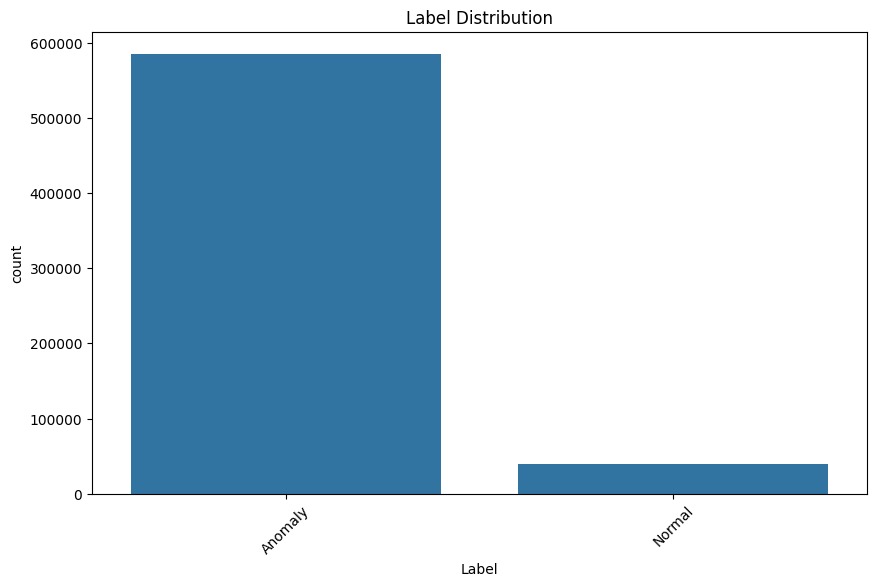

In [3]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

# Label Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=data)
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

# Encode the target variable
data['Label'] = data['Label'].astype('category').cat.codes

In [4]:
# Load your data
# Assuming 'data' is already loaded and contains your dataset

# Separate features and target variable
X = data.drop(columns=['Label'])
y = data['Label']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create a column transformer to handle the preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply the transformations to the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply PCA
pca = PCA(n_components=20)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

# Print the shapes to verify the transformation
print('X_train_pca shape:', X_train_pca.shape)
print('X_test_pca shape:', X_test_pca.shape)

X_train_pca shape: (437790, 20)
X_test_pca shape: (187625, 20)


In [5]:
# Print the PCA components and the explained variance ratio
print("PCA Components:")
print(pca.components_)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Get the names of the original features after encoding
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols.tolist() + encoded_feature_names.tolist()

# Display the principal components with their corresponding original features
pca_components_df = pd.DataFrame(pca.components_, columns=all_feature_names)
print("\nPrincipal Components with Original Features:")
print(pca_components_df)

PCA Components:
[[-0.03644219  0.10850762 -0.02049769 ...  0.00701758  0.00159714
   0.00186093]
 [-0.11984936  0.07236545 -0.09583045 ...  0.00572748  0.00028309
  -0.00101748]
 [-0.00995831 -0.06003438 -0.22249625 ...  0.00468153  0.00961655
   0.02673174]
 ...
 [ 0.05090366 -0.03679263 -0.02563811 ... -0.00561971  0.00321861
   0.0095917 ]
 [ 0.05301504 -0.03680583 -0.01169172 ... -0.00835138  0.0012862
   0.00649775]
 [ 0.10934788  0.12760389  0.07307194 ...  0.01700102 -0.00085495
   0.00074406]]

Explained Variance Ratio:
[0.18595293 0.15284095 0.08973894 0.068996   0.04690814 0.04107218
 0.0391579  0.03232534 0.03137228 0.02764821 0.02419977 0.02315314
 0.01836541 0.01555188 0.01509994 0.01422376 0.01389781 0.01293906
 0.01271354 0.01128923]

Principal Components with Original Features:
    Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0  -0.036442  0.108508 -0.020498      -0.163837     -0.023709     -0.052291   
1  -0.119849  0.072365 -0.095830     

In [6]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store the performance metrics
performance_metrics = {}

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the performance metrics dictionary
performance_metrics = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_pca, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_pca)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Get the classification report as a dictionary
    
    # Store the performance metrics
    performance_metrics[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'y_true': y_test.tolist(),  # Store true labels for confusion matrix
        'y_pred': y_pred.tolist()   # Store predicted labels for confusion matrix
    }

# Print the performance metrics for each model
for model_name, metrics in performance_metrics.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("-" * 60)


Model: Logistic Regression
Accuracy: 0.9742624916722186
Classification Report:
{'0': {'precision': 0.9795760082730093, 'recall': 0.9931904563818815, 'f1-score': 0.9863362543397742, 'support': 175489.0}, '1': {'precision': 0.8767660101062185, 'recall': 0.700560316413975, 'f1-score': 0.7788210507030642, 'support': 12136.0}, 'accuracy': 0.9742624916722186, 'macro avg': {'precision': 0.9281710091896138, 'recall': 0.8468753863979283, 'f1-score': 0.8825786525214192, 'support': 187625.0}, 'weighted avg': {'precision': 0.972926030190386, 'recall': 0.9742624916722186, 'f1-score': 0.9729137119742307, 'support': 187625.0}}
------------------------------------------------------------
Model: Random Forest
Accuracy: 0.9989020652898069
Classification Report:
{'0': {'precision': 0.9988729444042828, 'recall': 0.9999544130971172, 'f1-score': 0.9994133861855294, 'support': 175489.0}, '1': {'precision': 0.9993303197723087, 'recall': 0.9836849044166117, 'f1-score': 0.9914458931982394, 'support': 12136.0}, 

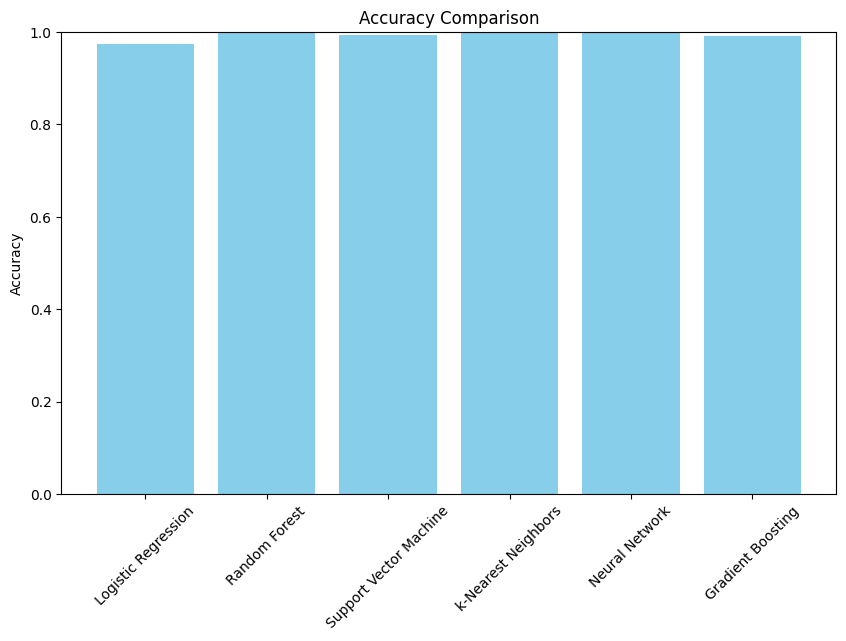

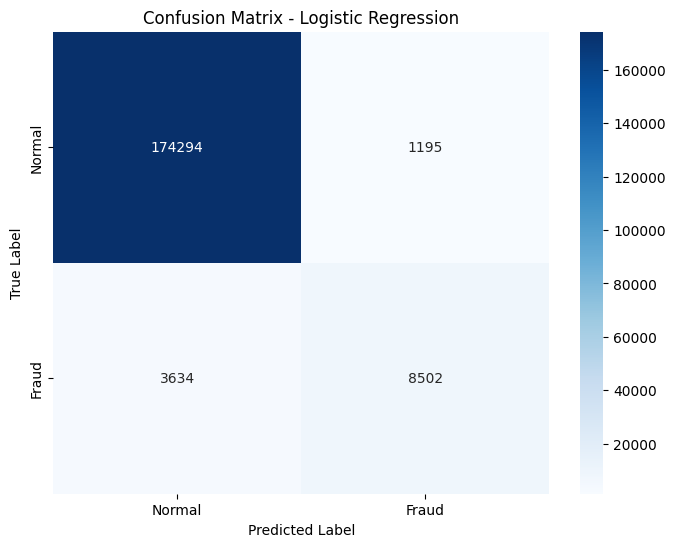

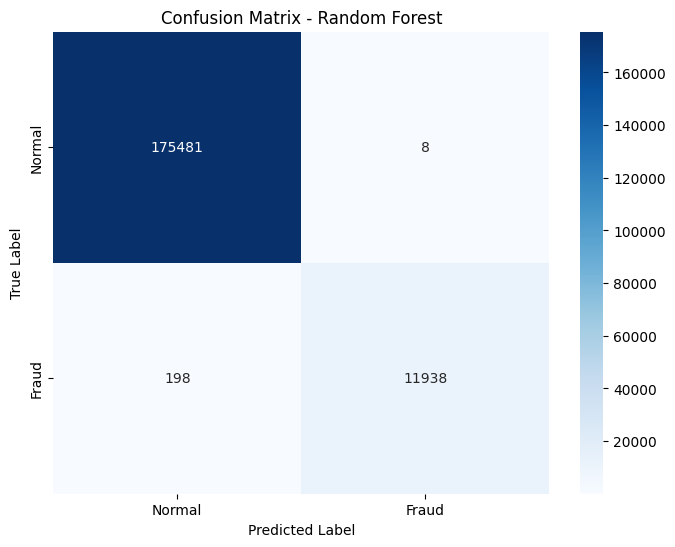

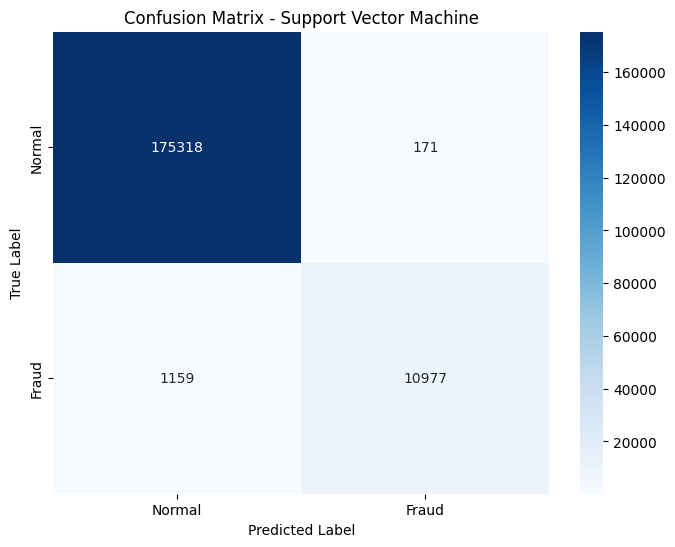

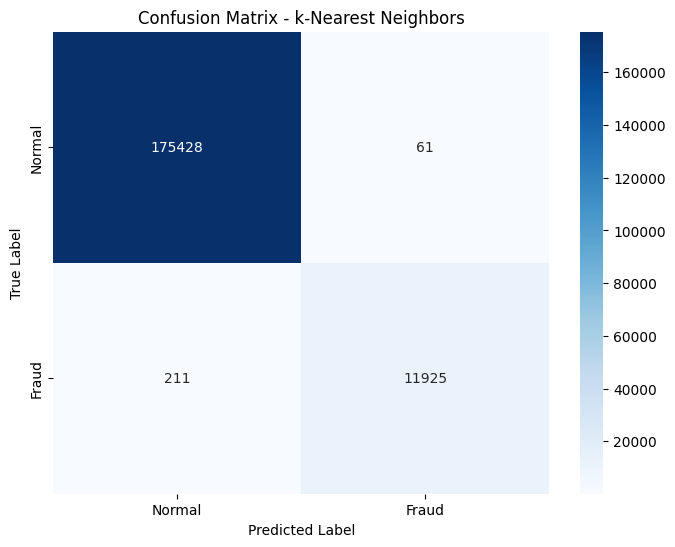

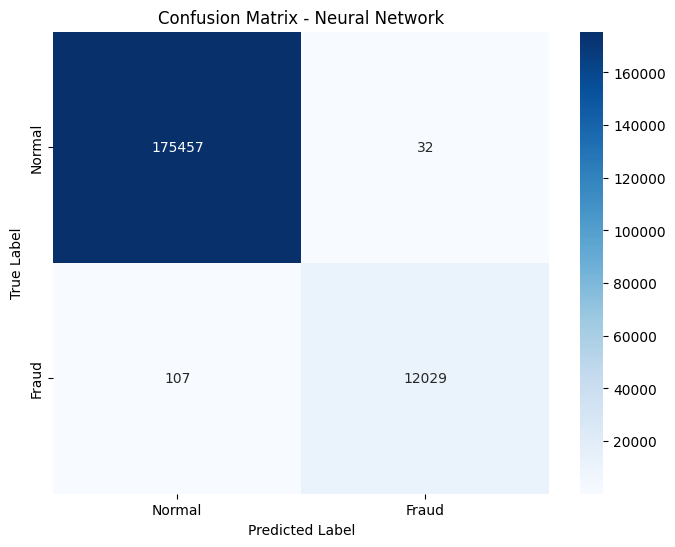

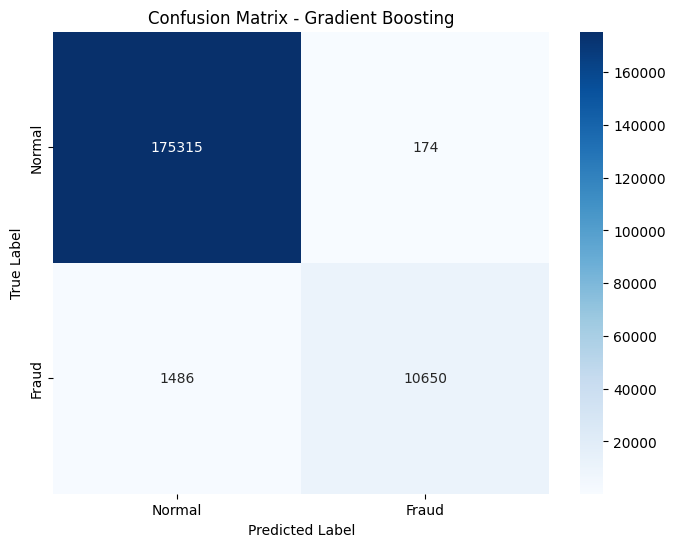

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Define a function to plot accuracy
def plot_accuracy(accuracies):
    plt.figure(figsize=(10, 6))
    models = list(accuracies.keys())
    acc_values = list(accuracies.values())
    plt.bar(models, acc_values, color='skyblue')
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison')
    plt.xticks(rotation=45)
    plt.show()

# Plotting accuracy
plot_accuracy({model_name: metrics['accuracy'] for model_name, metrics in performance_metrics.items()})

# Plotting confusion matrices
for model_name, metrics in performance_metrics.items():
    plot_confusion_matrix(metrics['y_true'], metrics['y_pred'], model_name)
